# Feedback analysis
___

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Yelp reviews

In [2]:
df = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', delimiter= '\t', header=None)

In [3]:
df.columns = ['review', 'positive']

In [4]:
df.head()

,review,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df.shape

(1000, 2)

In [6]:
pd.Series(' '.join(df['review']).lower().split()).value_counts()

the                582
and                388
i                  303
was                292
a                  237
to                 216
is                 171
this               142
of                 125
not                115
it                 110
for                107
in                 104
food                92
we                  79
place               77
very                74
my                  72
with                71
be                  66
had                 66
so                  66
are                 62
good                62
that                62
were                61
but                 61
have                61
great               57
they                56
                  ... 
regularly,           1
(the                 1
degree.              1
100%                 1
nice.)               1
kiddos!              1
getting.             1
fantastic!           1
walls                1
handled              1
trap                 1
gourmet              1
dried      

In [7]:
df['review'] = df['review'].str.lower()
df['review'] = df['review'].str.replace('[^\w\s]','')

In [10]:
keywords = ['loved', 'not good', 'not tasty', 'great', 'worst', "won't", 'good', 'bad', 'nasty', 'was great', 'problem', 'angry', 'awful', 'disappointed', 'would not', 'lacked', 'overpriced', 'did not', 'best', 'beautiful', 'avoid', 'slow', 'prompt', 'mmm', 'recommend', 'amazing', 'cute', 'performed', 'wasnt good', 'decent', 'deal', 'happier', 'elsewhere', 'i like', 'redeeming', 'delight', 'deal', 'moist', 'fear', 'sick', 'tasty', 'nice', 'perfect', 'handmade', 'glad', 'wast', 'yummy', 'die for', 'fresh', 'sexy', 'will be back', 'quickly', 'fantastic', 'one of the b', 'wonderful', 'will go back', 'is not', 'go back', 'check it', 'friendly', 'ever', 'phenom', 'definitely worth', 'excellent', 'solid', 'rarely', 'wasnt helpful', 'wasnt very tasty', 'clean', 'right away', 'immediately', 'reasonab', 'always', 'delicious', 'dont go', 'bacon', 'fine dining', 'lovers', 'modern', 'definitely', 'healthy', 'incredible', 'interesting', 'really like', 'satisfied', 'is worth', 'delish', 'rich', 'bargain', 'fun', 'flavourful', 'much better', 'lighting', 'creamy', 'fast', 'they know', 'sticks', 'exquisite', 'definitely', 'waited', 'so good', 'happy', 'favorite place', 'sweet', 'i love', 'omg', 'its worth', 'ever had', 'outstanding', 'cool']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.review.str.contains(str(key), case=False)

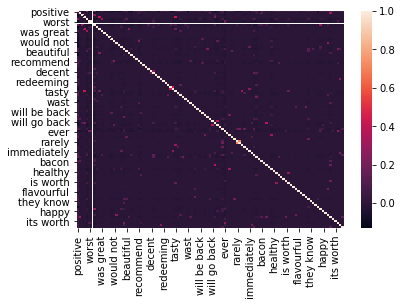

In [11]:
sns.heatmap(df.corr())

In [12]:
data = df[keywords]
target = df['positive']

In [13]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)


y_pred = bnb.predict(data)

In [14]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 150


In [15]:
sum(y_pred == target)/len(y_pred)


0.84999999999999998

# Amazon Reviews

In [16]:
df2 = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', delimiter= '\t', header=None)

In [17]:
df2.columns = ['review', 'positive']

In [18]:
df2.head()

,review,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [19]:
df2['review'] = df2['review'].str.lower()
df2['review'] = df2['review'].str.replace('[^\w\s]','')
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df2[str(key)] = df.review.str.contains(str(key), case=False)

In [20]:
data = df2[keywords]
target = df2['positive']
bnb = BernoulliNB()

bnb.fit(data, target)


y_pred = bnb.predict(data)

In [21]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 416


In [22]:
sum(y_pred == target)/len(y_pred)


0.58399999999999996

# Iterate and evaluate your classifier

In [23]:
data = df[keywords]
target = df['positive']
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([ 0.84,  0.85,  0.84,  0.86,  0.8 ,  0.8 ,  0.76,  0.79,  0.79,  0.76])

In [24]:
bnb.fit(data, target)
y_pred = bnb.predict(data)
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[470,  30],
       [120, 380]], dtype=int64)

Sensitivity = 380/500 .76
Specificity = 470/500 .94

In [25]:
470/500

0.94

# Iteration 2
focus on positives

In [26]:
df2 = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', delimiter= '\t', header=None)
df2.columns = ['review', 'positive']
df2['review'] = df['review'].str.lower()
df2['review'] = df['review'].str.replace('[^\w\s]','')
df3 = df2
df4 = df2
df5 = df2

In [27]:
keywords2 = ['loved', 'great', 'good','best', 'beautiful', 'prompt', 'mmm', 'recommend', 'amazing', 'cute', 'performed', 'decent', 'deal', 'happier', 'delight', 'deal', 'moist', 'tasty', 'nice', 'perfect', 'handmade', 'glad', 'yummy', 'die for', 'fresh', 'sexy', 'back', 'quickly', 'fantastic', 'one of the b', 'wonderful', 'check it', 'friendly', 'ever', 'phenom', 'definitely worth', 'excellent', 'solid', 'clean', 'right away', 'immediately', 'reasonab', 'always', 'delicious', 'fine dining', 'lovers', 'modern', 'definitely', 'healthy', 'incredible', 'interesting', 'really like', 'satisfied', 'is worth', 'delish', 'rich', 'bargain', 'fun', 'flavourful', 'much better', 'lighting', 'creamy', 'fast', 'they know', 'exquisite', 'definitely', 'waited', 'so good', 'happy', 'favorite place', 'sweet', 'i love', 'omg', 'outstanding', 'cool']

for key in keywords2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df2[str(key)] = df2.review.str.contains(str(key), case=False)

In [28]:
data = df2[keywords2]
target = df2['positive']
bnb.fit(data, target)

cross_val_score(bnb, data, target, cv=10)

array([ 0.71,  0.78,  0.8 ,  0.81,  0.76,  0.73,  0.73,  0.77,  0.75,  0.79])

# Iteration 3
focus on negatives

In [29]:
keywords3 = ['not good', 'not tasty', 'worst', "won't", 'bad', 'nasty', 'problem', 'angry', 'awful', 'disappointed', 'would not', 'lacked', 'overpriced', 'did not', 'avoid', 'slow', 'wasnt good', 'elsewhere', 'fear', 'sick', 'wast', 'is not', 'wasnt helpful', 'wasnt very tasty', 'dont go']

for key in keywords3:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df3[str(key)] = df3.review.str.contains(str(key), case=False)

In [30]:
data = df3[keywords3]
target = df3['positive']
bnb.fit(data, target)

cross_val_score(bnb, data, target, cv=10)

array([ 0.67,  0.59,  0.61,  0.58,  0.6 ,  0.59,  0.62,  0.66,  0.63,  0.63])

# Iteration 4
add more keywords

In [31]:
keywords4 = ['loved', 'not good', 'not tasty', 'great', 'worst', "won't", 'good', 'bad', 'nasty', 'was great', 'problem', 'angry', 'awful', 'disappointed', 'would not', 'lacked', 'overpriced', 'did not', 'best', 'beautiful', 'avoid', 'slow', 'prompt', 'mmm', 'recommend', 'amazing', 'cute', 'performed', 'wasnt good', 'decent', 'deal', 'happier', 'elsewhere', 'i like', 'redeeming', 'delight', 'deal', 'moist', 'fear', 'sick', 'tasty', 'nice', 'perfect', 'handmade', 'glad', 'wast', 'yummy', 'die for', 'fresh', 'sexy', 'will be back', 'quickly', 'fantastic', 'one of the b', 'wonderful', 'will go back', 'is not', 'go back', 'check it', 'friendly', 'ever', 'phenom', 'definitely worth', 'excellent', 'solid', 'rarely', 'wasnt helpful', 'wasnt very tasty', 'clean', 'right away', 'immediately', 'reasonab', 'always', 'delicious', 'dont go', 'bacon', 'fine dining', 'lovers', 'modern', 'definitely', 'healthy', 'incredible', 'interesting', 'really like', 'satisfied', 'is worth', 'delish', 'rich', 'bargain', 'fun', 'flavourful', 'much better', 'lighting', 'creamy', 'fast', 'they know', 'sticks', 'exquisite', 'definitely', 'waited', 'so good', 'happy', 'favorite place', 'sweet', 'i love', 'omg', 'its worth', 'ever had', 'outstanding', 'cool', 'wasnt fresh', 'dirty', 'average', 'wasnt worth it', 'professional', 'fail', 'but no', 'new fav', 'highlight', 'fell in love', 'killer', 'enjoyed', 'flavorless', 'go to place', 'place to go', 'approval', 'a lot', 'awesome', 'stars', 'especially', 'been back', 'at best', 'devine', 'impressed', 'huge', 'thumbs up', 'pretty well', 'a must', 'pretty', 'hooked', 'pleased', 'quick', 'awe', 'dis']

for key in keywords4:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df4[str(key)] = df4.review.str.contains(str(key), case=False)

In [32]:
#fails = df['review'][target != y_pred]
#for i in fails:
#    print(i)

In [33]:
data = df4[keywords4]
target = df4['positive']
bnb.fit(data, target)

cross_val_score(bnb, data, target, cv=10)

array([ 0.83,  0.86,  0.84,  0.84,  0.8 ,  0.82,  0.81,  0.85,  0.84,  0.82])

In [34]:
y_pred = bnb.predict(data)
confusion_matrix(target, y_pred)

array([[479,  21],
       [ 98, 402]], dtype=int64)

# Iteration 5

In [35]:
keywords5 = ['loved', 'not good', 'not tasty', 'great', 'worst', "won't", 'good', 'bad', 'nasty', 'was great', 'problem', 'angry', 'awful', 'disappointed', 'would not', 'lacked', 'overpriced', 'did not', 'best', 'beautiful', 'avoid', 'slow', 'prompt', 'mmm', 'recommend', 'amazing', 'cute', 'performed', 'wasnt good', 'decent', 'deal', 'happier', 'elsewhere', 'i like', 'redeeming', 'delight', 'deal', 'moist', 'fear', 'sick', 'tasty', 'nice', 'perfect', 'handmade', 'glad', 'wast', 'yummy', 'die for', 'fresh', 'sexy', 'will be back', 'quickly', 'fantastic', 'one of the b', 'wonderful', 'will go back', 'is not', 'go back', 'check it', 'friendly', 'ever', 'phenom', 'definitely worth', 'excellent', 'solid', 'rarely', 'wasnt helpful', 'wasnt very tasty', 'clean', 'right away', 'immediately', 'reasonab', 'always', 'delicious', 'dont go', 'bacon', 'fine dining', 'lovers', 'modern', 'definitely', 'healthy', 'incredible', 'interesting', 'really like', 'satisfied', 'is worth', 'delish', 'rich', 'bargain', 'fun', 'flavourful', 'much better', 'lighting', 'creamy', 'fast', 'they know', 'sticks', 'exquisite', 'definitely', 'waited', 'so good', 'happy', 'favorite place', 'sweet', 'i love', 'omg', 'its worth', 'ever had', 'outstanding', 'cool', 'wasnt fresh', 'dirty', 'average', 'wasnt worth it', 'professional', 'fail', 'but no', 'new fav', 'highlight', 'fell in love', 'killer', 'enjoyed', 'flavorless', 'go to place', 'place to go', 'approval', 'a lot', 'awesome', 'stars', 'especially', 'been back', 'at best', 'devine', 'impressed', 'huge', 'thumbs up', 'pretty well', 'a must', 'pretty', 'hooked', 'pleased', 'quick', 'awe', 'dis', 'didnt taste', 'highly', 'combos', 'beyond', 'immediately', 'lordy', 'spot', 'healthy', 'plus', 'world', 'you cant', 'wow', 'recommendation', 'special', 'star', 'every time', 'joy', 'jewel', 'filling', 'unhealthy', 'recomm', 'extra', 'regular', 'quality', 'hands down']

for key in keywords5:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df5[str(key)] = df5.review.str.contains(str(key), case=False)

In [36]:
data = df5[keywords5]
target = df5['positive']
bnb.fit(data, target)

cross_val_score(bnb, data, target, cv=10)

array([ 0.82,  0.86,  0.81,  0.83,  0.83,  0.83,  0.86,  0.84,  0.85,  0.83])

In [37]:
y_pred = bnb.predict(data)
confusion_matrix(target, y_pred)

array([[477,  23],
       [ 81, 419]], dtype=int64)

In [38]:
sum(y_pred == target)/len(y_pred)

0.89600000000000002

## Recursive Feature Elimination

In [40]:
from sklearn.feature_selection import RFE

# Pass any estimator to the RFE constructor
selector = RFE(bnb)
selector = selector.fit(data, target)

In [42]:
print(selector.ranking_)

[66  1  1 85  1  1 86  1  1 48  1  1  1 44  1  1  1  7 79 34  1  1 14  1 67
 80  1  1  1  1 43  1  1 47  1 46 45 23  1  1 61 83 77  1  2  1 33 12 68  1
 28  1 71 22 53  1  1 51  3 81 84  1  8 65  1  1  1  1 58  1  1 57 73 82  1
 40  4  1  1 64 27 35 18  1  1 15 29  1  1 42  1  1  1  5 75  1  9  1 63  1
 56 60  1 38 76  1  1 36 20 19  1  1  1  1  6  1 13  1 30  1  1 41  1  1 11
  1 32 74 55  1  1  1  1  1 39 24  1 10 69  1 25 49 72 78  1 21  1  1  1  1
 62 31  1  1  1 16 17 54 52  1 59  1  1  1 70 26 37 50  1]


In [43]:
rankings = pd.DataFrame({'Features': data.columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking')

,Features,Ranking
84,satisfied,1
111,dirty,1
110,wasnt fresh,1
106,its worth,1
105,omg,1
102,favorite place,1
99,waited,1
97,exquisite,1
95,they know,1
92,lighting,1


## Do any of your classifiers seem to overfit?
the first two somewhat. 

## Which seem to perform the best? Why?
The 5th version. I think because the model doesn't know to classify a review as positive unless it has a feature in it, and the wording varies so much that the more features really helped.
## Which features seemed to be most impactful to performance?
Words that are not commonly usied in both good and not good reviews.